In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [126]:
data = pd.read_csv('Ball_by_Ball.csv')
player = pd.read_csv('Player.csv')
team = pd.read_csv('Team.csv')
match = pd.read_csv('Match.csv')
season = pd.read_csv('season.csv')
player_m = pd.read_csv('Player_Match.csv')

In [95]:
player_m.head()
#data['Dissimal_Type'].value_counts()

,Match_Id,Player_Id,Team_Id,Is_Keeper,Is_Captain
0,335987,1,1,0,1
1,335987,2,1,0,0
2,335987,3,1,0,0
3,335987,4,1,0,0
4,335987,5,1,0,0


In [96]:
#Maximum Wickets
Wickets = data[(data['Dissimal_Type'] != " ") & (data['Dissimal_Type'] != "run out") & (data['Dissimal_Type'] != "hit wicket") & (data['Dissimal_Type'] != "retired hurt") & (data['Dissimal_Type'] != "obstructing the field") ]
Wickets.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
33,335987,1,6,2,1,2,1,1,2,15,0,,,1,caught,9
74,335987,1,13,1,1,2,3,3,2,9,0,,,3,caught,14
106,335987,1,18,1,1,2,4,4,2,13,0,,,4,caught,10
131,335987,2,2,1,2,1,6,1,7,84,0,,,6,bowled,
138,335987,2,3,2,2,1,8,3,7,106,0,,,8,bowled,


In [97]:
data['Dissimal_Type'].unique()

array([' ', 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [98]:
Wickets.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
33,335987,1,6,2,1,2,1,1,2,15,0,,,1,caught,9
74,335987,1,13,1,1,2,3,3,2,9,0,,,3,caught,14
106,335987,1,18,1,1,2,4,4,2,13,0,,,4,caught,10
131,335987,2,2,1,2,1,6,1,7,84,0,,,6,bowled,
138,335987,2,3,2,2,1,8,3,7,106,0,,,8,bowled,


In [99]:
#Wickets['Dissimal_Type'].value_counts()
Wickets['Dissimal_Type'] = Wickets['Dissimal_Type'] = 1
Wickets.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
33,335987,1,6,2,1,2,1,1,2,15,0,,,1,1,9
74,335987,1,13,1,1,2,3,3,2,9,0,,,3,1,14
106,335987,1,18,1,1,2,4,4,2,13,0,,,4,1,10
131,335987,2,2,1,2,1,6,1,7,84,0,,,6,1,
138,335987,2,3,2,2,1,8,3,7,106,0,,,8,1,


In [100]:
Total = Wickets.groupby('Bowler_Id')['Dissimal_Type'].sum()
Total.nlargest(5)

Bowler_Id
194    120
50     107
67     101
136    100
71      98
Name: Dissimal_Type, dtype: int64

In [101]:
records = pd.DataFrame({'Player_Id':Total.index,'Wickets_Taken':Total.values})
records.head()

,Player_Id,Wickets_Taken
0,1,8
1,4,5
2,5,2
3,8,4
4,9,44


In [102]:
mergeResultw = pd.merge(records, player, on='Player_Id',how='left').sort_values(by='Wickets_Taken', ascending=False)
mergeResultw.nlargest(5,'Wickets_Taken')

,Player_Id,Wickets_Taken,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
121,194,120,SL Malinga,28-Aug-83,Right_Hand,Right-arm fast,Sri Lanka,0,NaN
28,50,107,Harbhajan Singh,03-Jul-80,Right_Hand,Right-arm offbreak,India,0,NaN
39,67,101,PP Chawla,24-Dec-88,Left_Hand,Legbreak,India,0,NaN
81,136,100,A Mishra,24-Nov-82,Right_Hand,Legbreak,India,0,NaN
42,71,98,DJ Bravo,07-Oct-83,Right_Hand,Right-arm medium-fast,West Indies,0,NaN


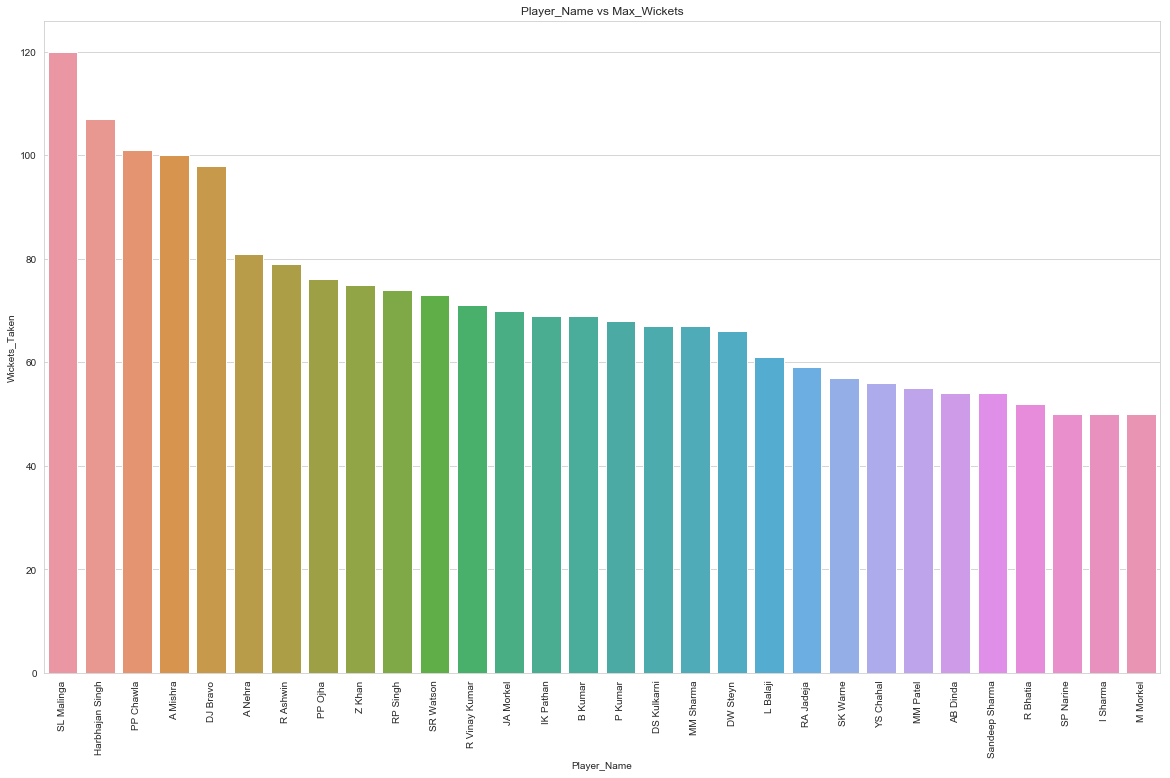

In [103]:
#Wickets_Graph
plt.figure(figsize=(20,12))
sns.barplot(y='Wickets_Taken', x="Player_Name", data=mergeResultw.head(30))
plt.title('Player_Name vs Max_Wickets')
plt.xticks(rotation=90)
plt.show()

In [71]:
Wickets['Dissimal_Type'].sum()

4934

In [72]:
#Maximum Sixes
maxsix = data[data['Batsman_Scored'] == "6"]
maxsix.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
10,335987,1,2,4,1,2,2,2,1,15,6,,,,,
20,335987,1,4,2,1,2,2,2,1,13,6,,,,,
25,335987,1,4,7,1,2,2,2,1,13,6,,,,,
60,335987,1,10,5,1,2,2,2,3,16,6,,,,,
65,335987,1,11,4,1,2,3,3,2,9,6,,,,,


In [73]:
msixes = maxsix.groupby('Striker_Id')['Batsman_Scored'].count()
msixes.nlargest(5)

Striker_Id
162    252
57     164
21     161
8      148
31     143
Name: Batsman_Scored, dtype: int64

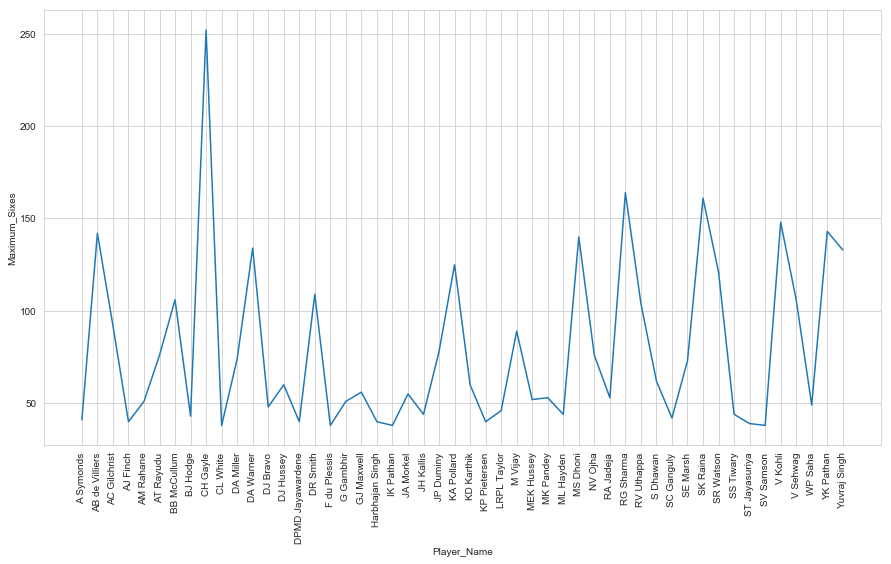

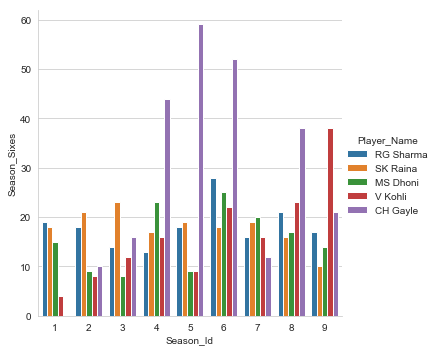

In [154]:
records = pd.DataFrame({'Player_Id':msixes.index,'Maximum_Sixes':msixes.values}).sort_values(by='Maximum_Sixes', ascending=False).head(50)
mergeResults = pd.merge(records, player, on='Player_Id',how='left')
mergeResults.nlargest(5,'Maximum_Sixes')

season_wise = data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
season_wise = season_wise[season_wise['Batsman_Scored']=='6']
data_season = match.loc[:,('Match_Id','Season_Id')]
season_wise = season_wise.merge(data_season, on='Match_Id')
season_sixes = season_wise.groupby(['Season_Id','Striker_Id'])['Batsman_Scored'].count().reset_index()
data_player = player.loc[:,('Player_Id','Player_Name')].rename(columns={'Player_Id':'Striker_Id'})

season_sixes = season_sixes.merge(data_player, on='Striker_Id').rename(columns={'Batsman_Scored':'Season_Sixes'})
season_sixes = season_sixes.sort_values(by=['Season_Id','Season_Sixes'], ascending=[True,False]).drop('Striker_Id',axis=1)
season_sixes = season_sixes.loc[(season_sixes.Player_Name=='SK Raina') | (season_sixes.Player_Name=='MS Dhoni') | (season_sixes.Player_Name=='V Kohli') | (season_sixes.Player_Name=='RG Sharma') | (season_sixes.Player_Name=='CH Gayle'),:]

sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.lineplot(x='Player_Name',y='Maximum_Sixes',data=mergeResults)
plt.xticks(rotation=90)

sns.catplot(x="Season_Id", y="Season_Sixes",kind='bar',hue="Player_Name",data=season_sixes)


In [76]:
#Maximum Fours
maxfour = data[data['Batsman_Scored'] == '4']
maxfour.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
8,335987,1,2,2,1,2,2,2,1,15,4,,,,,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,,
11,335987,1,2,5,1,2,2,2,1,15,4,,,,,
16,335987,1,3,4,1,2,2,2,1,14,4,,,,,
22,335987,1,4,4,1,2,1,1,2,13,4,,,,,


In [77]:
maxf = maxfour.groupby('Striker_Id')['Batsman_Scored'].count()
maxf.nlargest(5)

Striker_Id
40    422
8     360
21    360
42    348
46    341
Name: Batsman_Scored, dtype: int64

In [107]:
records = pd.DataFrame({'Player_Id':maxf.index,'Maximum_Fours':maxf.values}).sort_values(by='Maximum_Fours', ascending=False).head(50)
mergeResultf = pd.merge(records, player, on='Player_Id',how='left')
mergeResultf.nlargest(5,'Maximum_Fours')

,Player_Id,Maximum_Fours,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
0,40,422,G Gambhir,14-Oct-81,Left_Hand,Legbreak,India,0,NaN
1,8,360,V Kohli,05-Nov-88,Right_Hand,Right-arm medium,India,0,NaN
2,21,360,SK Raina,27-Nov-86,Left_Hand,Right-arm offbreak,India,0,NaN
3,42,348,S Dhawan,05-Dec-85,Left_Hand,Right-arm offbreak,India,0,NaN
4,46,341,RV Uthappa,11-Nov-85,Right_Hand,Right-arm medium,India,0,NaN


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

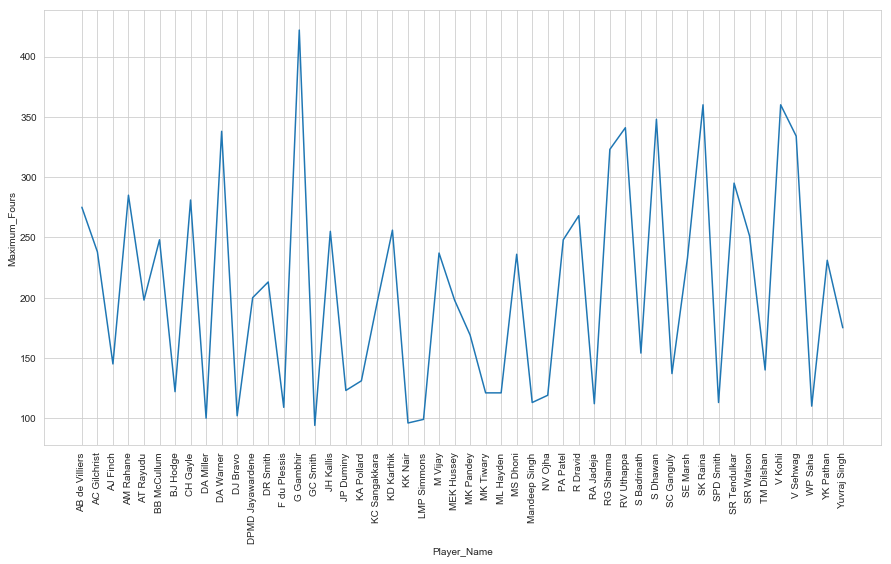

In [108]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.lineplot(x='Player_Name',y='Maximum_Fours',data=mergeResultf)
plt.xticks(rotation=90)

In [109]:
#Maximum Runs
data['Batsman_Scored'].unique()

array(['0', '4', '6', '1', '2', 'Do_nothing', '5', '3', ' '], dtype=object)

In [110]:
cleaned = data[(data['Batsman_Scored'] != '0') & (data['Batsman_Scored'] != 'Do_nothing') & (data['Batsman_Scored'] != ' ')]
cleaned.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
8,335987,1,2,2,1,2,2,2,1,15,4,,,,,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,,
10,335987,1,2,4,1,2,2,2,1,15,6,,,,,
11,335987,1,2,5,1,2,2,2,1,15,4,,,,,
16,335987,1,3,4,1,2,2,2,1,14,4,,,,,


In [111]:
cleaned['Batsman_Scored'] = cleaned['Batsman_Scored'].apply(lambda x: int(x))
maxruns = cleaned.groupby('Striker_Id')['Batsman_Scored'].sum()
maxruns.head()

Striker_Id
1    1349
2    2435
3      91
4    1322
5      64
Name: Batsman_Scored, dtype: int64

In [112]:
records = pd.DataFrame({'Player_Id':maxruns.index,'Maximum_Runs':maxruns.values}).sort_values(by='Maximum_Runs',ascending=False).head(50)
mergeResultr = pd.merge(records, player, on='Player_Id',how='left')
mergeResultr.nlargest(5,'Maximum_Runs')

,Player_Id,Maximum_Runs,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
0,21,4106,SK Raina,27-Nov-86,Left_Hand,Right-arm offbreak,India,0,NaN
1,8,4105,V Kohli,05-Nov-88,Right_Hand,Right-arm medium,India,0,NaN
2,57,3874,RG Sharma,30-Apr-87,Right_Hand,Right-arm offbreak,India,0,NaN
3,40,3634,G Gambhir,14-Oct-81,Left_Hand,Legbreak,India,0,NaN
4,162,3447,CH Gayle,21-Sep-79,Left_Hand,Right-arm offbreak,West Indies,0,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

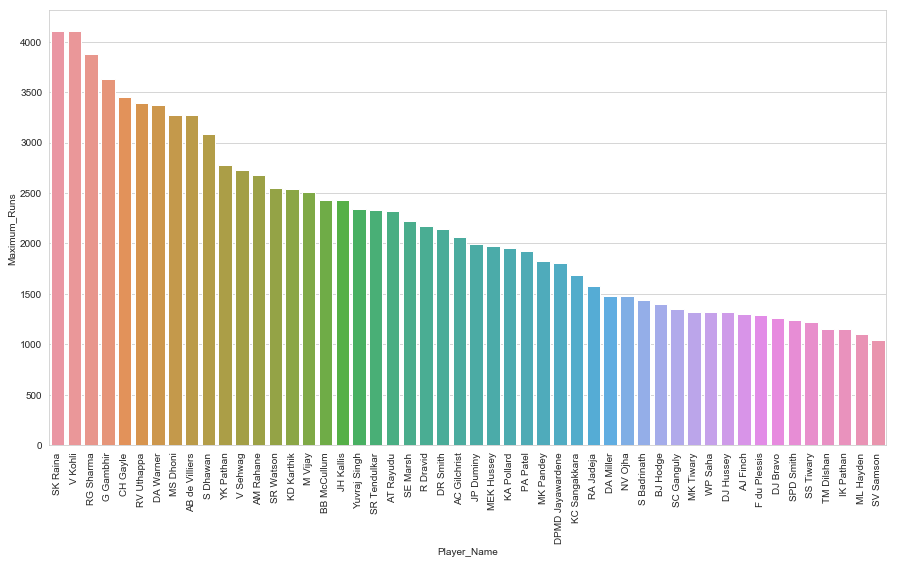

In [113]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.barplot(x='Player_Name',y='Maximum_Runs',data=mergeResult)
plt.xticks(rotation=90)

In [156]:
#Maximum Runs by Team
teamss = data[(data['Batsman_Scored'] != '0') & (data['Batsman_Scored'] != 'Do_nothing') & (data['Batsman_Scored'] != ' ')]
teamss.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
8,335987,1,2,2,1,2,2,2,1,15,4,,,,,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,,
10,335987,1,2,4,1,2,2,2,1,15,6,,,,,
11,335987,1,2,5,1,2,2,2,1,15,4,,,,,
16,335987,1,3,4,1,2,2,2,1,14,4,,,,,


In [157]:
teamss['Batsman_Scored'] = teamss['Batsman_Scored'].apply(lambda x: int(x))
maxruns_team = teamss.groupby('Team_Batting_Id')['Batsman_Scored'].sum()
maxruns_team

Team_Batting_Id
1     18209
2     20464
3     19940
4     19720
5     16658
6     18532
7     20662
8     10881
9      1758
10     6040
11     8806
12     1962
13     2318
Name: Batsman_Scored, dtype: int64

In [158]:
records = pd.DataFrame({'Team_Id':maxruns_team.index,'Maximum_Runs':maxruns_team.values})
records

,Team_Id,Maximum_Runs
0,1,18209
1,2,20464
2,3,19940
3,4,19720
4,5,16658
5,6,18532
6,7,20662
7,8,10881
8,9,1758
9,10,6040


In [169]:
mergeResulttr = pd.merge(records, team, on='Team_Id',how='left')
mergeResulttr.drop_duplicates()

,Team_Id,Maximum_Runs,Team_Name,Team_Short_Code
0,1,18209,Kolkata Knight Riders,KKR
1,2,20464,Royal Challengers Bangalore,RCB
2,3,19940,Chennai Super Kings,CSK
3,4,19720,Kings XI Punjab,KXIP
4,5,16658,Rajasthan Royals,RR
5,6,18532,Delhi Daredevils,DD
6,7,20662,Mumbai Indians,MI
7,8,10881,Deccan Chargers,DC
8,9,1758,Kochi Tuskers Kerala,KTK
9,10,6040,Pune Warriors,PW


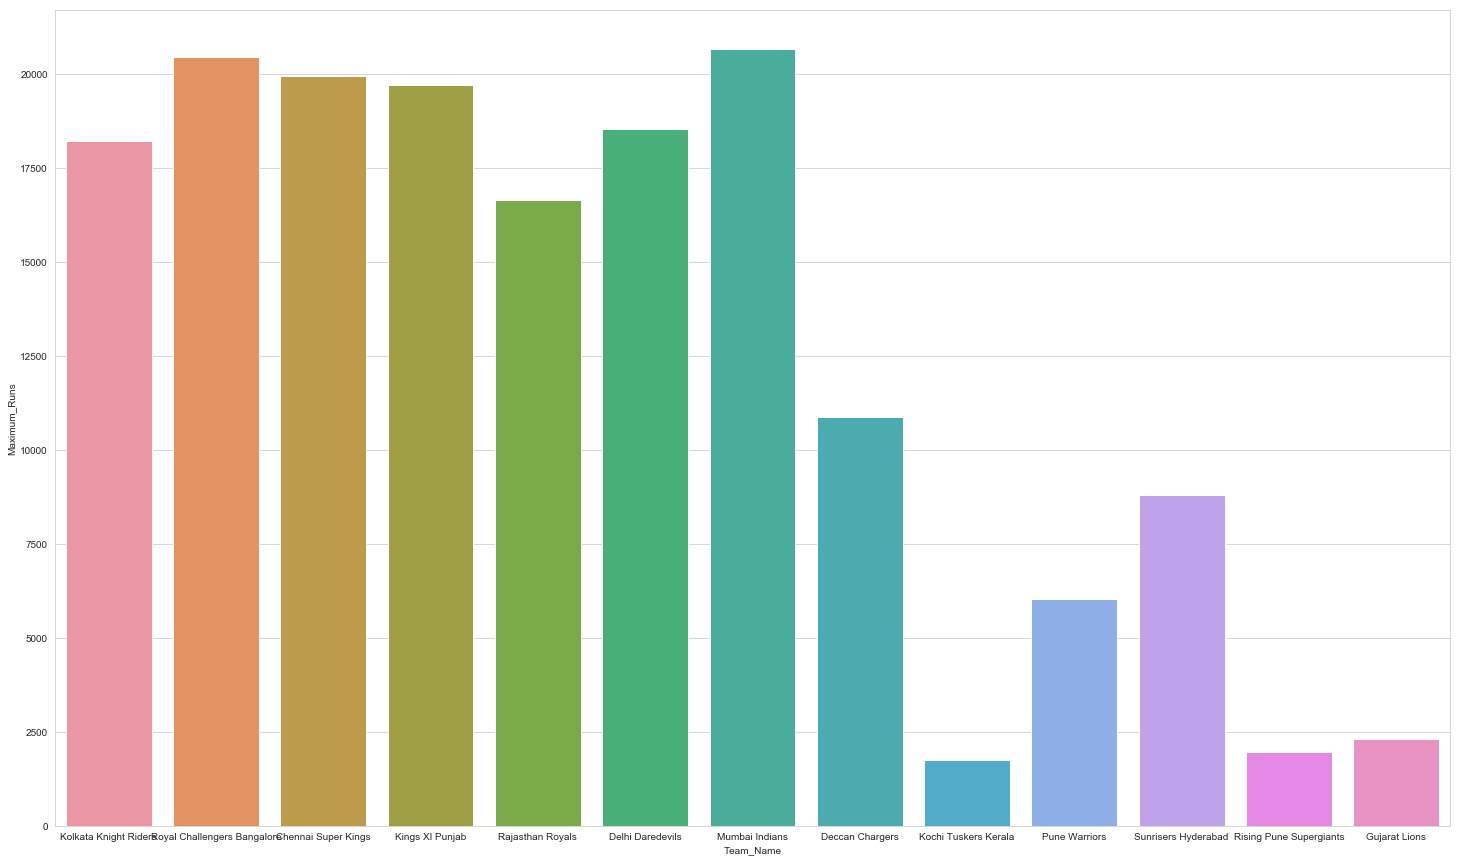

In [176]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,15))
sns.barplot(x="Team_Name", y='Maximum_Runs',
               data=mergeResulttr)

In [185]:
#Total Matches in Each Stadium
most_matches = match.groupby('Venue_Name')['Match_Id'].count()
most_matches.nlargest(5)
most_matches = pd.DataFrame({'Venue_Name':most_matches.index,'Total_Matches':most_matches.values})
most_matches

,Venue_Name,Total_Matches
0,Barabati Stadium,7
1,Brabourne Stadium,11
2,Buffalo Park,3
3,De Beers Diamond Oval,3
4,Dr DY Patil Sports Academy,17
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11
6,Dubai International Cricket Stadium,7
7,Eden Gardens,54
8,Feroz Shah Kotla,53
9,Green Park,2


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text xticklabel objects>)

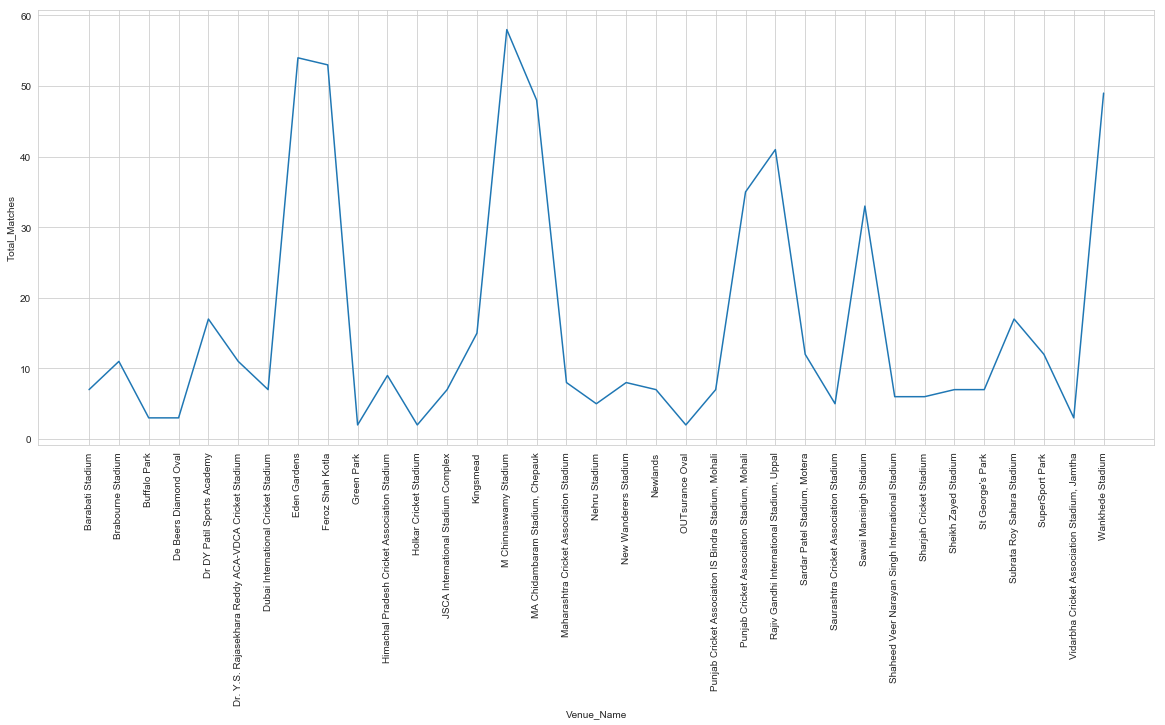

In [187]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.lineplot(x="Venue_Name", y='Total_Matches',
               data=most_matches)
plt.xticks(rotation=90)

In [29]:
#Match Winning in Each Stadium Most By Team
match_winner_each_std = match.loc[:,('Venue_Name','Match_Winner_Id')]

team['Team_Id'] = team['Team_Id'].astype(float)

team_data = team.loc[:,('Team_Id','Team_Name')]

match_winner_each_std=match_winner_each_std.rename(index=str,columns={'Match_Winner_Id':'Team_Id'})

team_winners = match_winner_each_std.merge(team_data, on="Team_Id")
team_winner_count = team_winners.groupby(['Venue_Name','Team_Name'])['Team_Id'].count()
team_winner_count.nlargest(5)

final_result = pd.DataFrame(team_winner_count)
team_lucky = final_result.sort_values(by='Team_Name')

team_lucky=team_lucky.rename(index=str,columns={'Team_Id':'Matches Wins'})

#Find Lucky Teams
lucky_punjab = team_lucky[team_lucky.index.get_level_values('Team_Name') == 'Kings XI Punjab'].sort_values(by='Matches Wins', ascending=False)['Matches Wins']

most_match_in_best = team_lucky[team_lucky.index.get_level_values('Team_Name') == 'Kings XI Punjab'].sort_values(by='Matches Wins', ascending=False)['Matches Wins'][0]
best_stadium_punjab = lucky_punjab.index.get_level_values('Venue_Name')[0]

top_five_best = lucky_punjab.index.get_level_values('Venue_Name')[:5]

"Kings XI Punjab - "+str(best_stadium_punjab)+" - "+str(most_match_in_best)

'Kings XI Punjab - Punjab Cricket Association Stadium, Mohali - 18'

In [30]:
datas = pd.DataFrame(team_lucky.to_records())
datas[datas['Team_Name']=='Kings XI Punjab'].nlargest(1,'Matches Wins')

,Venue_Name,Team_Name,Matches Wins
86,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18


In [31]:
#Man of the Match
match['Man_Of_The_Match_Id']=match['Man_Of_The_Match_Id'].astype(str).astype(float)
a=match.loc[:,('Match_Id','Man_Of_The_Match_Id')]

player['Player_Id']=player['Player_Id'].astype(float)
b=player.loc[:,('Player_Id','Player_Name')]

c=b.rename(index=str,columns={'Player_Id':'Man_Of_The_Match_Id'})

d=a.merge(c,on='Man_Of_The_Match_Id')

e=d.sort_values(by='Man_Of_The_Match_Id')

l=e.groupby('Man_Of_The_Match_Id')['Player_Name'].count()

f=c.merge(l,on='Man_Of_The_Match_Id')
h=f.rename(columns={'Player_Name_x':'Player_Name','Player_Name_y':'most_man_of_the_match_awards'})
h.sort_values(by='most_man_of_the_match_awards',ascending=False).head(10)

,Man_Of_The_Match_Id,Player_Name,most_man_of_the_match_awards
90,162.0,CH Gayle,17
21,31.0,YK Pathan,16
67,110.0,AB de Villiers,15
98,187.0,DA Warner,14
36,57.0,RG Sharma,13
14,21.0,SK Raina,13
12,19.0,MEK Hussey,12
26,40.0,G Gambhir,12
13,20.0,MS Dhoni,12
52,85.0,AM Rahane,12


In [32]:
#Purple Cap Id
datap = season.loc[:,('Season_Year','Orange_Cap_Id')]
orangecap_player = player.loc[:,('Player_Id','Player_Name')]
orangecap_player = orangecap_player.rename(columns={'Player_Id':'Orange_Cap_Id'})
final = datap.merge(orangecap_player, on="Orange_Cap_Id")
final

,Season_Year,Orange_Cap_Id,Player_Name
0,2008,100,SE Marsh
1,2009,18,ML Hayden
2,2010,133,SR Tendulkar
3,2011,162,CH Gayle
4,2012,162,CH Gayle
5,2013,19,MEK Hussey
6,2014,46,RV Uthappa
7,2015,187,DA Warner
8,2016,8,V Kohli


In [33]:
#Purple Cap Id
datao = season.loc[:,('Season_Year','Purple_Cap_Id')]
purplecap_player = player.loc[:,('Player_Id','Player_Name')]
purplecap_player = purplecap_player.rename(columns={'Player_Id':'Purple_Cap_Id'})
final = datao.merge(purplecap_player, on="Purple_Cap_Id")
final

,Season_Year,Purple_Cap_Id,Player_Name
0,2008,102,Sohail Tanvir
1,2009,61,RP Singh
2,2010,131,PP Ojha
3,2011,194,SL Malinga
4,2012,190,M Morkel
5,2013,71,DJ Bravo
6,2015,71,DJ Bravo
7,2014,364,MM Sharma
8,2016,299,B Kumar


In [34]:
#Man of the Series
datas = season.loc[:,('Season_Year','Man_of_the_Series_Id')]
manofseries = player.loc[:,('Player_Id','Player_Name')]
manofseries= manofseries.rename(columns={'Player_Id':'Man_of_the_Series_Id'})
final = datas.merge(manofseries, on="Man_of_the_Series_Id")
final

,Season_Year,Man_of_the_Series_Id,Player_Name
0,2008,32,SR Watson
1,2013,32,SR Watson
2,2009,53,AC Gilchrist
3,2010,133,SR Tendulkar
4,2011,162,CH Gayle
5,2012,315,SP Narine
6,2014,305,GJ Maxwell
7,2015,334,AD Russell
8,2016,8,V Kohli


In [35]:
#Math Winnings of Each Team
match_data = match.loc[:,('Match_Id','Match_Date','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','Win_Type','Won_By')]
team_data = team.loc[:,('Team_Id','Team_Short_Code')]
team_data = team_data.rename(columns={'Team_Id':'Team_Name_Id'})

result = match_data.merge(team_data, on='Team_Name_Id')

result = result.drop('Team_Name_Id', axis=1)

result=result.rename(columns={'Opponent_Team_Id':'Team_Name_Id','Team_Short_Code':'Team_Name'})
result=result.merge(team_data,on='Team_Name_Id')

result=result.drop('Team_Name_Id',axis=1)

final_res = result.rename(columns={'Match_Winner_Id':'Team_Name_Id','Team_Short_Code':'Opponent_Team_Name'})

final_res = final_res.merge(team_data,on='Team_Name_Id')

final_res = final_res.drop('Team_Name_Id',axis=1)

winner_team = final_res.rename(columns={'Team_Short_Code':'Winner_Team'})
winner_team = winner_team.sort_values(by='Match_Id').reset_index()
winner_team = winner_team.drop('index',axis=1)
winner_team = winner_team[['Match_Id','Match_Date','Team_Name','Opponent_Team_Name','Winner_Team','Win_Type','Won_By']]
winner_team

,Match_Id,Match_Date,Team_Name,Opponent_Team_Name,Winner_Team,Win_Type,Won_By
0,335987,18-Apr-08,RCB,KKR,KKR,by runs,140.0
1,335988,19-Apr-08,KXIP,CSK,CSK,by runs,33.0
2,335989,19-Apr-08,DD,RR,DD,by wickets,9.0
3,335990,20-Apr-08,MI,RCB,RCB,by wickets,5.0
4,335991,20-Apr-08,KKR,DC,KKR,by wickets,5.0
5,335992,21-Apr-08,RR,KXIP,RR,by wickets,6.0
6,335993,22-Apr-08,DC,DD,DD,by wickets,9.0
7,335994,23-Apr-08,CSK,MI,CSK,by runs,6.0
8,335995,24-Apr-08,DC,RR,RR,by wickets,3.0
9,335996,25-Apr-08,KXIP,MI,KXIP,by runs,66.0


In [36]:
#Man of the Match
mom=match.loc[:,('Match_Id','Man_Of_The_Match_Id')]
plr=player.loc[:,('Player_Id','Player_Name')]
plr=plr.rename(columns={'Player_Id':'Man_Of_The_Match_Id'})

mom=mom.merge(plr,on='Man_Of_The_Match_Id')

man_of_match=mom.merge(winner_team,on='Match_Id')

man_of_match=man_of_match.sort_values(by='Match_Id')

man_of_match=man_of_match.drop(columns='Man_Of_The_Match_Id').rename(columns={'Player_Name':'Man_of_the_match'})

man_of_match



,Match_Id,Man_of_the_match,Match_Date,Team_Name,Opponent_Team_Name,Winner_Team,Win_Type,Won_By
0,335987,BB McCullum,18-Apr-08,RCB,KKR,KKR,by runs,140.0
5,335988,MEK Hussey,19-Apr-08,KXIP,CSK,CSK,by runs,33.0
17,335989,MF Maharoof,19-Apr-08,DD,RR,DD,by wickets,9.0
18,335990,MV Boucher,20-Apr-08,MI,RCB,RCB,by wickets,5.0
20,335991,DJ Hussey,20-Apr-08,KKR,DC,KKR,by wickets,5.0
22,335992,SR Watson,21-Apr-08,RR,KXIP,RR,by wickets,6.0
32,335993,V Sehwag,22-Apr-08,DC,DD,DD,by wickets,9.0
43,335994,ML Hayden,23-Apr-08,CSK,MI,CSK,by runs,6.0
47,335995,YK Pathan,24-Apr-08,DC,RR,RR,by wickets,3.0
63,335996,KC Sangakkara,25-Apr-08,KXIP,MI,KXIP,by runs,66.0


In [37]:
#Season Wise Winner
season_data = match.loc[:,('Season_Id','Match_Winner_Id')]
win = season_data.groupby('Season_Id').tail(1)

team_data=team.loc[:,('Team_Id','Team_Short_Code')]
team_data = team_data.rename(columns = {'Team_Id':'Match_Winner_Id','Team_Short_Code':'Team_Name'})
win.merge(team_data, on='Match_Winner_Id').drop('Match_Winner_Id', axis=1)


,Season_Id,Team_Name
0,1,RR
1,2,DC
2,3,CSK
3,4,CSK
4,5,KKR
5,7,KKR
6,6,MI
7,8,MI
8,9,SRH


In [38]:
#total no of scores get by a bowler in all seasons
cleaned['Batsman_Scored'] = cleaned['Batsman_Scored'].apply(lambda x: int(x))
max_score=cleaned.groupby('Bowler_Id')['Batsman_Scored'].sum()
max_score=pd.DataFrame(max_score)

nw_plyr=player.rename(columns={'Player_Id':'Bowler_Id'})
#max_score.rename(columns={:'Player_Id'})

max_score_bowler=nw_plyr.merge(max_score, on='Bowler_Id').sort_values(by='Batsman_Scored',ascending=False)
max_score_bowler=max_score_bowler.rename(columns={'Batsman_Scored':'Max_score_get'})

max_score_bowler.drop('Bowler_Id',axis=1)
max_score_bowler[['Player_Name','Max_score_get']].head()

,Player_Name,Max_score_get
29,Harbhajan Singh,3030
40,PP Chawla,3021
8,P Kumar,2966
86,A Mishra,2846
50,R Vinay Kumar,2830


In [39]:
#total no of dot balls by players in all seasons

zeros=data[data.Batsman_Scored == '0']

zeros=zeros.groupby('Striker_Id')['Batsman_Scored'].count()
max_zero=pd.DataFrame(zeros)

max_zero=max_zero.sort_values(by='Batsman_Scored',ascending=False)
#max_zero1=max_zero.rename(columns={'Striker_Id':'Player_Id'})
#max_zero1
player_name=player.loc[:,('Player_Id','Player_Name')]
player_name=player_name.rename(columns={'Player_Id':'Striker_Id'})
player_name1=player_name.merge(max_zero,on='Striker_Id').sort_values(by='Batsman_Scored',ascending=False)

player_name1.drop('Striker_Id',axis=1).head()

,Player_Name,Batsman_Scored
7,V Kohli,1191
39,G Gambhir,1166
45,RV Uthappa,1089
159,CH Gayle,1088
56,RG Sharma,1081


In [40]:
#Super_Over_Winners
super_over = match.loc[(match.IS_Superover == 1), ('Match_Id','Match_Date','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','IS_Superover')]
team_names = team.loc[:,('Team_Id','Team_Short_Code')]
team_names = team_names.rename(columns={'Team_Id':'Team_Name_Id'})
super_data = super_over.merge(team_names, on='Team_Name_Id').drop('Team_Name_Id', axis=1)
super_data = super_data.rename(columns={'Team_Short_Code':'Team_Name','Opponent_Team_Id':'Team_Name_Id'})
super_data = super_data.merge(team_names, on='Team_Name_Id').drop('Team_Name_Id', axis=1)
super_data = super_data.rename(columns={'Team_Short_Code':'Opponent_Team_Name','Match_Winner_Id':'Team_Name_Id'})
super_data = super_data.merge(team_names, on='Team_Name_Id').drop('Team_Name_Id', axis=1)
super_data = super_data.rename(columns={'Team_Short_Code':'Match_Winner_Name'})
super_data.drop('IS_Superover', axis=1).sort_values(by='Season_Id', ascending=True)

,Match_Id,Match_Date,Season_Id,Team_Name,Opponent_Team_Name,Match_Winner_Name
0,392195,23-Apr-09,2,KKR,RR,RR
2,419126,21-Mar-10,3,CSK,KXIP,KXIP
4,598009,7-Apr-13,6,SRH,RCB,SRH
5,598022,16-Apr-13,6,RCB,DD,RCB
1,729320,29-Apr-14,7,KKR,RR,RR
3,829746,21-Apr-15,8,RR,KXIP,KXIP


In [41]:
#Toss_Winners
toss_s = match.loc[:, ('Match_Id','Match_Date','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','Toss_Winner_Id')]
team_names = team.loc[:,('Team_Id','Team_Short_Code')]
team_names = team_names.rename(columns={'Team_Id':'Team_Name_Id'})
toss_data = toss_s.merge(team_names, on='Team_Name_Id').drop('Team_Name_Id', axis=1)
toss_data = toss_data.rename(columns={'Team_Short_Code':'Team_Name','Opponent_Team_Id':'Team_Name_Id'})
toss_data = toss_data.merge(team_names, on='Team_Name_Id').drop('Team_Name_Id', axis=1)
toss_data = toss_data.rename(columns={'Team_Short_Code':'Opponent_Team_Name','Match_Winner_Id':'Team_Name_Id'})
toss_data = toss_data.merge(team_names, on='Team_Name_Id').drop('Team_Name_Id', axis=1)
toss_data = toss_data.rename(columns={'Team_Short_Code':'Match_Winner_Name','Toss_Winner_Id':'Team_Name_Id'})
toss_data = toss_data.merge(team_names, on='Team_Name_Id').drop('Team_Name_Id', axis=1)
toss_data = toss_data.rename(columns={'Team_Short_Code':'Toss_Winner_Name'})
toss_data.sort_values(by='Match_Id', ascending=True).head()

,Match_Id,Match_Date,Season_Id,Team_Name,Opponent_Team_Name,Match_Winner_Name,Toss_Winner_Name
0,335987,18-Apr-08,1,RCB,KKR,KKR,RCB
403,335988,19-Apr-08,1,KXIP,CSK,CSK,CSK
477,335989,19-Apr-08,1,DD,RR,DD,RR
261,335990,20-Apr-08,1,MI,RCB,RCB,MI
332,335991,20-Apr-08,1,KKR,DC,KKR,DC


In [42]:
#Wins as Captain 

captain_data=player_m.loc[(player_m.Is_Captain== 1),('Match_Id','Player_Id','Is_Captain','Team_Id')]

match_data = match.loc[:,('Match_Id','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id')]
final_data = match_data.merge(captain_data, on='Match_Id', how='left')
final_data = final_data.loc[(final_data.Match_Winner_Id== final_data.Team_Id)]
final_data = final_data.groupby('Player_Id')['Match_Winner_Id'].count()

total_match_as_cap = captain_data.groupby('Player_Id')['Match_Id'].count()
total_match_as_cap = pd.DataFrame(total_match_as_cap)
total_match_as_cap = total_match_as_cap.rename(columns={'Match_Id':'Total_Matches_as_Captain'})

captain_win = pd.DataFrame(final_data)
player_data = player.loc[:,('Player_Id','Player_Name')]
captain_win = player_data.merge(captain_win,on='Player_Id')
captain_win = captain_win.merge(total_match_as_cap, on='Player_Id')
captain_win['Win_Percentage'] = ( captain_win['Match_Winner_Id'].values / captain_win['Total_Matches_as_Captain'].values) * 100
captain_win.sort_values(by='Match_Winner_Id', ascending=False).head(5)

,Player_Id,Player_Name,Match_Winner_Id,Total_Matches_as_Captain,Win_Percentage
8,20.0,MS Dhoni,83,142,58.450704
14,40.0,G Gambhir,61,107,57.009346
5,8.0,V Kohli,37,71,52.112676
20,53.0,AC Gilchrist,35,74,47.297297
22,57.0,RG Sharma,34,58,58.620690


In [51]:
#Total Matches in All Seasons
total_matches = match.loc[:,('Match_Id','Season_Id')]
total_matches = total_matches.groupby('Season_Id')['Match_Id'].count()
total_matches = pd.DataFrame(total_matches)
total_matches.rename(columns={'Match_Id':'Total_Matches'})

,Total_Matches
Season_Id,
1,58
2,57
3,60
4,73
5,74
6,76
7,60
8,59
9,60


In [52]:
#Max catches
catch = data.loc[data.Dissimal_Type=='caught',('Dissimal_Type','Fielder_Id')]

catch['Fielder_Id']=catch['Fielder_Id'].astype(str).astype(float)
catch=catch.groupby('Fielder_Id')['Dissimal_Type'].count()

#catch.info()

player_c = player.loc[:,('Player_Id','Player_Name')]
#plr.info()

plr = player_c.rename (columns={'Player_Id':'Fielder_Id'})

catches=plr.merge(catch,on='Fielder_Id')
catches.sort_values(by='Dissimal_Type',ascending=False).drop('Fielder_Id',axis=1).head(5)

,Player_Name,Dissimal_Type
81,KD Karthik,72
101,AB de Villiers,72
18,SK Raina,67
42,RV Uthappa,58
17,MS Dhoni,51


In [70]:
#All Players Of Teams till 2016
playerss = player_m.loc[:,('Player_Id','Team_Id')].sort_values(by='Team_Id')
playerss['Player_Id'] = playerss['Player_Id'].astype(float)
playerss

player_data = player.loc[:,('Player_Id','Player_Name')]
player_data = player_data.merge(playerss,on='Player_Id')
playera = player_data.groupby('Team_Id')['Player_Name'].unique()

t1=pd.Series(playera[1])
t2=pd.Series(playera[2])
t3=pd.Series(playera[3])
t4=pd.Series(playera[4])
t5=pd.Series(playera[5])
t6=pd.Series(playera[6])
t7=pd.Series(playera[7])
t8=pd.Series(playera[8])
t9=pd.Series(playera[9])
t10=pd.Series(playera[10])
t11=pd.Series(playera[11])
t12=pd.Series(playera[12])
t13=pd.Series(playera[13])

#b=pd.DataFrame({'Player_Id': a.index, 'Max_fours':a.values})
dict1={'KKR':t1.values,'RCB':t2.values,'CSK':t3.values,'KXIP':t4.values,'RR':t5.values,'DD':t6.values,'MI':t7.values,'DC':t8.values,'KTK':t9.values,'PW':t10.values,'SRH':t11.values,'RPS':t12.values,'GL':t13.values}
df = pd.DataFrame.from_dict(dict1, orient='index')
df.transpose()

,KKR,RCB,CSK,KXIP,RR,DD,MI,DC,KTK,PW,SRH,RPS,GL
0,SC Ganguly,R Dravid,BB McCullum,DJ Hussey,R Dravid,Z Khan,RT Ponting,CL White,BB McCullum,SC Ganguly,CL White,MS Dhoni,BB McCullum
1,BB McCullum,W Jaffer,DJ Hussey,P Kumar,JDP Oram,JR Hopes,P Kumar,PA Patel,B Akhil,Yuvraj Singh,P Kumar,IK Pathan,P Kumar
2,RT Ponting,V Kohli,PA Patel,K Goel,T Kohli,Yuvraj Singh,Z Khan,KC Sangakkara,PA Patel,M Rawat,PA Patel,RP Singh,SK Raina
3,DJ Hussey,JH Kallis,ML Hayden,JR Hopes,YK Pathan,IK Pathan,PA Patel,S Dhawan,RA Jadeja,RV Uthappa,KC Sangakkara,SS Tiwary,RA Jadeja
4,Mohammad Hafeez,CL White,MEK Hussey,KC Sangakkara,SR Watson,G Gambhir,MEK Hussey,AC Gilchrist,VVS Laxman,AM Nayar,Yuvraj Singh,I Sharma,DJ Bravo
5,JH Kallis,MV Boucher,MS Dhoni,Yuvraj Singh,M Kaif,V Sehwag,JDP Oram,Y Venugopal Rao,RP Singh,LRPL Taylor,IK Pathan,AM Rahane,DS Kulkarni
6,MV Boucher,B Akhil,SK Raina,SM Katich,DS Lehmann,S Dhawan,S Dhawan,VVS Laxman,DPMD Jayawardene,A Nehra,S Dhawan,R Bhatia,KD Karthik
7,YK Pathan,AA Noffke,JDP Oram,IK Pathan,RA Jadeja,LRPL Taylor,L Ronchi,A Symonds,S Sreesanth,GC Smith,Y Venugopal Rao,AB Dinda,DW Steyn
8,G Gambhir,P Kumar,S Badrinath,T Kohli,M Rawat,Y Venugopal Rao,ST Jayasuriya,RG Sharma,R Vinay Kumar,M Kartik,A Nehra,JA Morkel,PJ Sangwan
9,RV Uthappa,Z Khan,RA Jadeja,M Kaif,D Salunkhe,LR Shukla,DJ Thornely,SB Styris,BJ Hodge,MK Pandey,I Sharma,KP Pietersen,DR Smith
